<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Visualization" data-toc-modified-id="Data-Visualization-1">Data Visualization</a></span><ul class="toc-item"><li><span><a href="#Import-the-necessary-libraries" data-toc-modified-id="Import-the-necessary-libraries-1.1">Import the necessary libraries</a></span></li><li><span><a href="#Import-the-datasets" data-toc-modified-id="Import-the-datasets-1.2">Import the datasets</a></span></li><li><span><a href="#Data-Exploration-and-Analysis" data-toc-modified-id="Data-Exploration-and-Analysis-1.3">Data Exploration and Analysis</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Column-selection-for-the-CO2-and-Greenhouse-Gas-Emissions-Dataset" data-toc-modified-id="Column-selection-for-the-CO2-and-Greenhouse-Gas-Emissions-Dataset-1.3.0.1">Column selection for the <em>CO2 and Greenhouse Gas Emissions</em> Dataset</a></span></li><li><span><a href="#Visualizing-the-data-for-temp_asia_clean" data-toc-modified-id="Visualizing-the-data-for-temp_asia_clean-1.3.0.2">Visualizing the data for <em>temp_asia_clean</em></a></span></li><li><span><a href="#Correlation-between-the-average-land-temperature-and-the-predictors" data-toc-modified-id="Correlation-between-the-average-land-temperature-and-the-predictors-1.3.0.3">Correlation between the average land temperature and the predictors</a></span></li></ul></li></ul></li></ul></li></ul></div>

# Data Visualization

##### This section serves to depict the data in visual diagrams for the purpose of identifying any outliers, trends, or patterns in the data more easily

##### The datasets that will be used in this section have already been cleaned in the Data Preparation section:
* *[CO2 and Greenhouse Gas Emissions](https://nyc3.digitaloceanspaces.com/owid-public/data/co2/owid-co2-data.csv)*
* *[Global Land Temperature By Country](https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data?resource=download&select=GlobalLandTemperaturesByCountry.csv)*

## Import the necessary libraries

In [201]:
# Data Manipulation
import pandas as pd
import numpy as np

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

## Import the datasets

In [206]:
temp_asia_clean = pd.read_csv("temp_asia_clean.csv")

# Shape of dataset
print(f"Shape of dataset:\n{temp_asia_clean.shape}")

# Total number of non-NA values in this dataset
print(f"\nTotal number of non-NA values in dataset:\n{pd.notna(temp_asia_clean).sum()}")

# Total number of NA values in this dataset
print(f"\nTotal number of NA values in dataset:\n{temp_asia_clean.isnull().sum()}")


# Summary of dataset
print(f"\n\nSummary of dataset:")
print(temp_asia_clean.info())


# Descriptive statistical summary of dataset
print(f"\n\nDescriptive statistical summary of dataset:\n{temp_asia_clean.describe()}")

Shape of dataset:
(11970, 5)

Total number of non-NA values in dataset:
dt                               11970
AverageTemperature               11970
AverageTemperatureUncertainty    11970
Country                          11970
Year                             11970
dtype: int64

Total number of NA values in dataset:
dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
Country                          0
Year                             0
dtype: int64


Summary of dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11970 entries, 0 to 11969
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   dt                             11970 non-null  object 
 1   AverageTemperature             11970 non-null  float64
 2   AverageTemperatureUncertainty  11970 non-null  float64
 3   Country                        11970 non-null  object 
 4 

In [207]:
temp_asia_clean

dt  AverageTemperature  AverageTemperatureUncertainty  \
0      1990-01-01            1.558000                        0.46000   
1      1990-02-01            3.669000                        0.24400   
2      1990-03-01            8.402000                        0.31100   
3      1990-04-01           14.457000                        0.23100   
4      1990-05-01           22.442000                        0.31600   
...           ...                 ...                            ...   
11965  2013-05-01           31.173000                        0.99300   
11966  2013-06-01           32.325000                        2.24900   
11967  2013-07-01           31.340000                        0.80400   
11968  2013-08-01           30.833000                        2.35200   
11969  2013-09-01           18.899033                        0.32167   

           Country  Year  
0      Afghanistan  1990  
1      Afghanistan  1990  
2      Afghanistan  1990  
3      Afghanistan  1990  
4      Afghanistan  1990  
...            ...   ...  
11965        Yemen  2013  
11966        Yemen  2013  
11967        Yemen  2013  
11968        Yemen  2013  
11969        Yemen  2013  

[11970 rows x 5 columns]

In [208]:
gas_asia_clean = pd.read_csv("gas_asia_clean.csv")

# Shape of dataset
print(f"Shape of dataset:\n{gas_asia_clean.shape}")

# Total number of non-NA values in this dataset
print(f"\nTotal number of non-NA values in dataset:\n{pd.notna(gas_asia_clean).sum()}")

# Total number of NA values in this dataset
print(f"\nTotal number of NA values in dataset:\n{gas_asia_clean.isnull().sum()}")


# Summary of dataset
print(f"\n\nSummary of dataset:")
print(gas_asia_clean.info())


# Descriptive statistical summary of dataset
print(f"\n\nDescriptive statistical summary of dataset:\n{gas_asia_clean.describe()}")

Shape of dataset:
(1008, 6)

Total number of non-NA values in dataset:
country                1008
year                   1008
co2_including_luc      1008
land_use_change_co2    1008
methane                1008
nitrous_oxide          1008
dtype: int64

Total number of NA values in dataset:
country                0
year                   0
co2_including_luc      0
land_use_change_co2    0
methane                0
nitrous_oxide          0
dtype: int64


Summary of dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country              1008 non-null   object 
 1   year                 1008 non-null   int64  
 2   co2_including_luc    1008 non-null   float64
 3   land_use_change_co2  1008 non-null   float64
 4   methane              1008 non-null   float64
 5   nitrous_oxide        1008 non-null   float64
dtypes: float64(4)

In [209]:
gas_asia_clean

country  year  co2_including_luc  land_use_change_co2  methane  \
0     Afghanistan  1990              2.427                0.403     6.74   
1     Afghanistan  1991              2.134                0.220     7.02   
2     Afghanistan  1992              0.163               -1.319     7.13   
3     Afghanistan  1993             -2.250               -3.737     7.21   
4     Afghanistan  1994             -1.807               -3.261     7.47   
...           ...   ...                ...                  ...      ...   
1003        Yemen  2009             27.109                2.858    19.44   
1004        Yemen  2010             22.601               -0.550    23.05   
1005        Yemen  2011             20.813                0.623    22.33   
1006        Yemen  2012             20.099               -0.256    19.80   
1007        Yemen  2013             26.061               -1.099    22.36   

      nitrous_oxide  
0              2.84  
1              2.93  
2              2.89  
3              2.93  
4              2.76  
...             ...  
1003           3.34  
1004           3.45  
1005           3.42  
1006           3.43  
1007           3.62  

[1008 rows x 6 columns]

<br>

## Data Exploration and Analysis

#### Column selection for the *CO2 and Greenhouse Gas Emissions* Dataset

The original dataset consists of 74 columns. However, for the purpose of this project, select columns were filtered out to be used in the forecasting.

The columns chosen are as follows:
1. `country`
2. `year`
3. **`co2_including_luc`**
4. **`land_use_change_co2`**
5. **`methane`**
6. **`nitrous_oxide`**

The bolded columns will also serve as the predictors for this project.



The [Codebook](https://github.com/owid/co2-data/blob/master/owid-co2-codebook.csv) provides the following desciptions for the columns chosen above:
* **co2_including_luc**
> "Annual total production-based emissions of carbon dioxide (CO₂), including land-use change, measured in million tonnes. This is based on territorial emissions, which do not account for emissions embedded in traded goods."

* **land_use_change_co2**
> "Annual production-based emissions of carbon dioxide (COâ‚‚) from land-use change, measured in million tonnes. This is based on territorial emissions, which do not account for emissions embedded in traded goods."

* **methane**
> "Total methane emissions including land-use change and forestry, measured in million tonnes of carbon dioxide-equivalents."

* **nitrous_oxide**
> "Total nitrous oxide emissions including land-use change and forestry, measured in million tonnes of carbon dioxide-equivalents."



The columns chosen consist of greenhouse gases, which are large contributers to climate change, and in this case, the rise in average surface temperature.

<br>


#### Visualizing the data for *temp_asia_clean*

##### Line plot to get a general idea of how the data is like

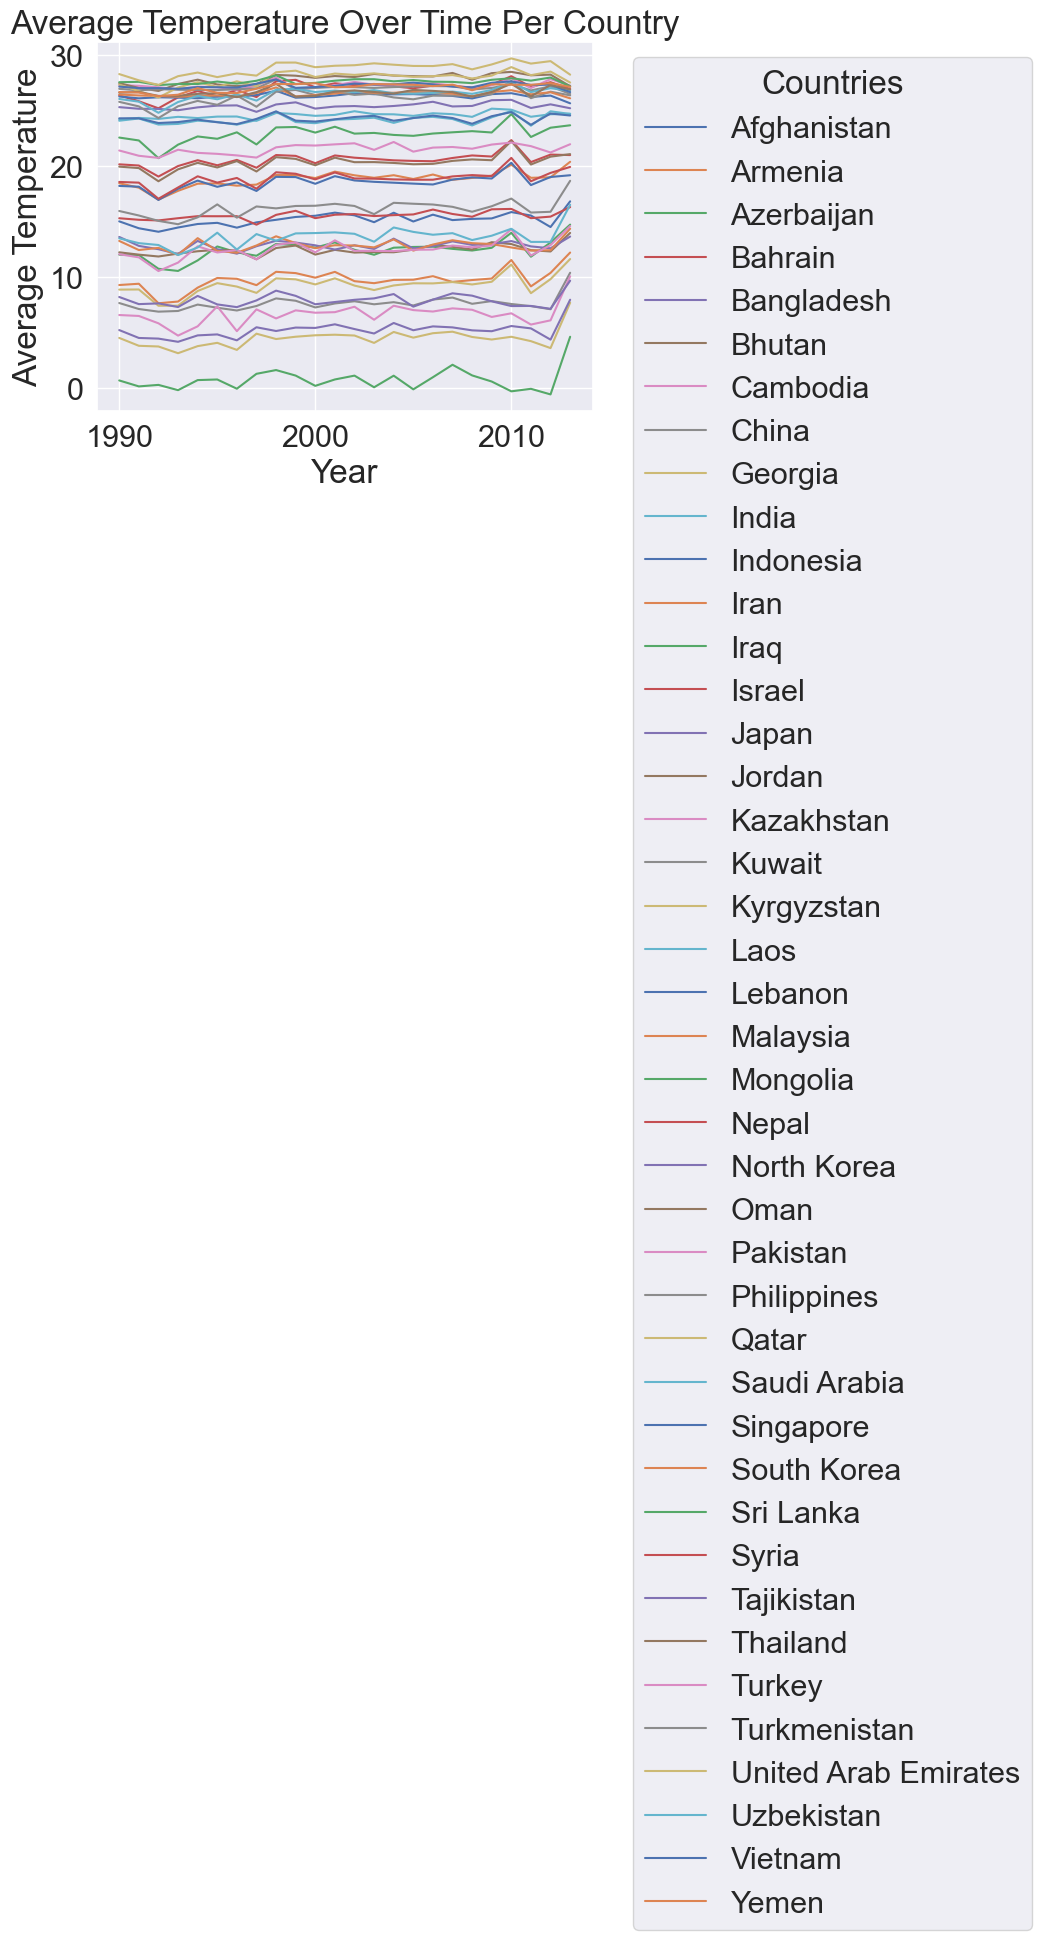

In [210]:
for c in temp_asia_clean["Country"].unique():
    df_c = temp_asia_clean.loc[temp_asia_clean["Country"] == c]
    df_c = df_c.reset_index(drop=True)

    lp = sns.lineplot(x=df_c["Year"], y=df_c["AverageTemperature"], data=df_c, ci=None, legend="brief", label=c).set(title="Average Temperature Over Time Per Country", xlabel="Year", ylabel="Average Temperature")

    
    

# tt = temp_asia_clean["Country"].unique()
# @cursor.connect("add")
# def on_add(sel):
#     sel.annotation.set(text=tt[sel.target.index])

plt.legend(title="Countries", loc="upper left", bbox_to_anchor=(1.05,1))
plt.show()

<br>

##### Box plot, Histogram, and Violin plot to see the distribution of the Average Temperature per country over the years

In [211]:
f, axes = plt.subplots(21, 2, figsize=(100, 220))

# In order to minimize space usage when the violin plots are plotted,
# the diagrams can be arranged into 2 columns.
count = 0
row = 0

for c in temp_asia_clean["Country"].unique():
    # Check which column the data can be placed in
    if count%2 == 0:
        column = 0
    else:
        column = 1
        
    df_c = temp_asia_clean.loc[temp_asia_clean["Country"] == c]
    df_c = df_c.reset_index(drop=True)
    sns.violinplot(data=df_c["AverageTemperature"], orient="h", ax=axes[row, column])
    ax = axes[row, column]
    ax.set_xlabel(c, fontsize=50)
    
    count += 1
    if count%2 == 0:
        row+=1

In [ ]:
f, axes = plt.subplots(42, 3, figsize=(100, 300))
f.subplots_adjust(hspace=0.75, wspace=0.5)


row = 0

for c in temp_asia_clean["Country"].unique():
        
    df_c = temp_asia_clean.loc[temp_asia_clean["Country"] == c]
    df_c = df_c.reset_index(drop=True)
    
    sns.boxplot(data=df_c["AverageTemperature"], orient="h", ax=axes[row, 0])
    sns.histplot(data=df_c["AverageTemperature"], ax=axes[row, 1])
    sns.violinplot(data=df_c["AverageTemperature"], orient="h", ax=axes[row, 2])

    ax = axes[row, column]
    ax.set_xlabel(c, fontsize=50)
    
    row += 1


plt.xticks(fontsize=100)
plt.yticks(fontsize=100)
plt.show()

<br>

##### Line plot to get a general idea of how the data is like

In [ ]:
predictors = ["co2_including_luc", "land_use_change_co2", "methane", "nitrous_oxide"]



for p in predictors:
    plt.figure(figsize=(20, 10))
    
    for c in gas_asia_clean["country"].unique():
        df_c = gas_asia_clean.loc[gas_asia_clean["country"] == c]
        df_c = df_c.reset_index(drop=True)

        sns.lineplot(x=df_c["year"], y=df_c[p], ci=None, legend="brief", label=c)
    
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.title(f"{p} emission over the years", fontsize=30)
    plt.ylabel(f"{p} per million tonnes",fontsize=25)
    plt.xlabel("Years", fontsize=25)
    plt.legend(title="Countries", loc="upper left", bbox_to_anchor=(1.05,1))
    plt.show()


<br>

##### Box plot, Histogram, and Violin plot to see the distribution of the predictors over the years

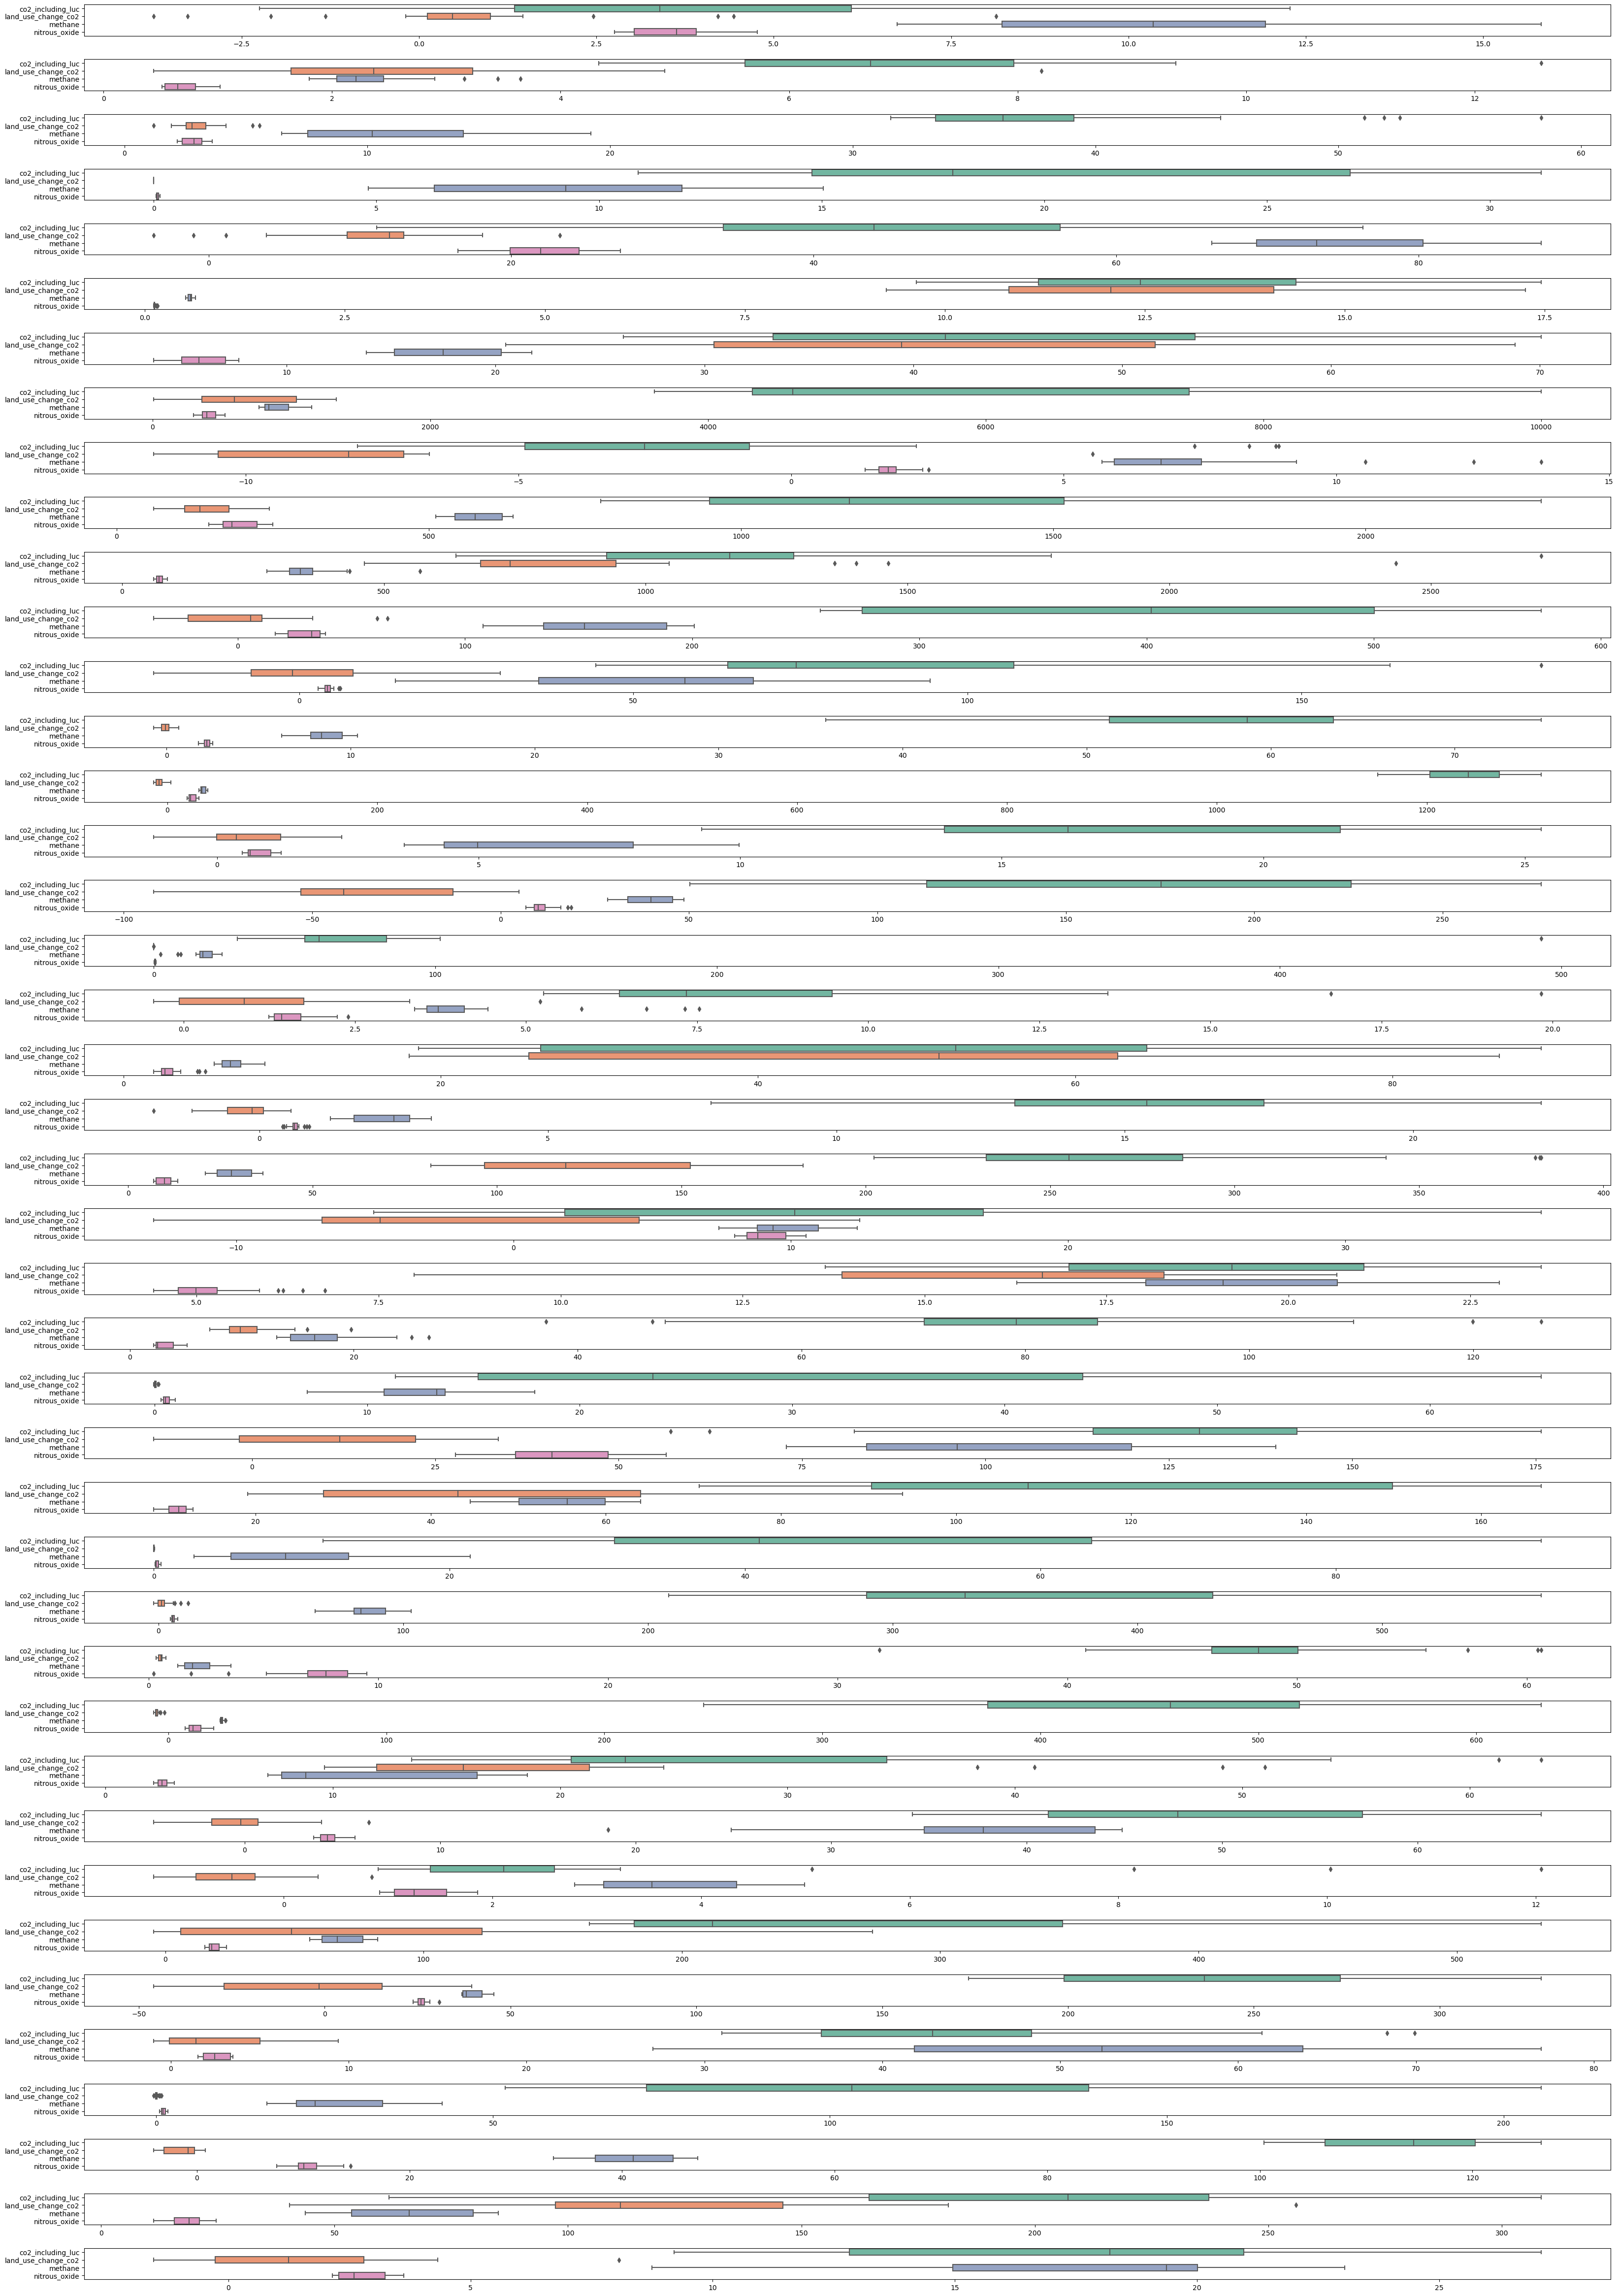

In [158]:
f, axes = plt.subplots(42, 1, figsize=(40, 60))
f.subplots_adjust(hspace=0.75, wspace=0.5)

sns.set_palette("Set2")
row = 0

for c in gas_asia_clean["country"].unique():
    df_c = gas_asia_clean.loc[gas_asia_clean["country"] == c]
    df_c = df_c.reset_index(drop=True)

    sns.boxplot(data=df_c[predictors], orient="h", ax=axes[row])

    ax.set_xlabel(c, fontsize=70)
#     ax.set_title(c, fontsize=70)
    
    row += 1



plt.show()

<br>

#### Correlation between the average land temperature and the predictors

The method that will be used is Pearson correlation. This method is used to determine the linear relationship between two variables by measuring their relationship on a scale of -1 to 1.

> It should be noted that when using the Pearson correlatin, outliers in the data is highly not recommended as they may adversely affect the accuracy of the correlation estimation, and the data being used must be homoscedastic (meaning that the variance is the same across all values of the predictors.


For the purpose of this correlation, only one country will be used, as using all of the countries in the dataset may overcomplicate the process and may also overcomplicate the correlation diagram produced, causing the diagram to be difficult to interpret. 

The country that will be used is China, as the data for China in both datasets do not contain outliers. 

In [190]:
# Filter out the data required fromm both datasets with respect to China, and store the data into a new dataframe
gas_china = gas_asia_clean.loc[gas_asia_clean["country"] == "China"].reset_index(drop=True)

temp_china = temp_asia_clean.loc[temp_asia_clean["Country"]== "China"].reset_index(drop=True)
temp_china = temp_china.pivot_table('AverageTemperature',"Year", aggfunc="mean").reset_index(drop=True)

# Store columns into new dataframe
df_china = gas_china.copy()
df_china.insert(2, "avg_temperature", temp_china["AverageTemperature"])


# Calculate the correlation
df_china_corr = df_china.iloc[:, 2:].corr()
df_china_corr

avg_temperature  co2_including_luc  land_use_change_co2  \
avg_temperature             1.000000           0.445322            -0.396644   
co2_including_luc           0.445322           1.000000            -0.892809   
land_use_change_co2        -0.396644          -0.892809             1.000000   
methane                     0.427578           0.988803            -0.852597   
nitrous_oxide               0.471020           0.948155            -0.933049   

                      methane  nitrous_oxide  
avg_temperature      0.427578       0.471020  
co2_including_luc    0.988803       0.948155  
land_use_change_co2 -0.852597      -0.933049  
methane              1.000000       0.925733  
nitrous_oxide        0.925733       1.000000

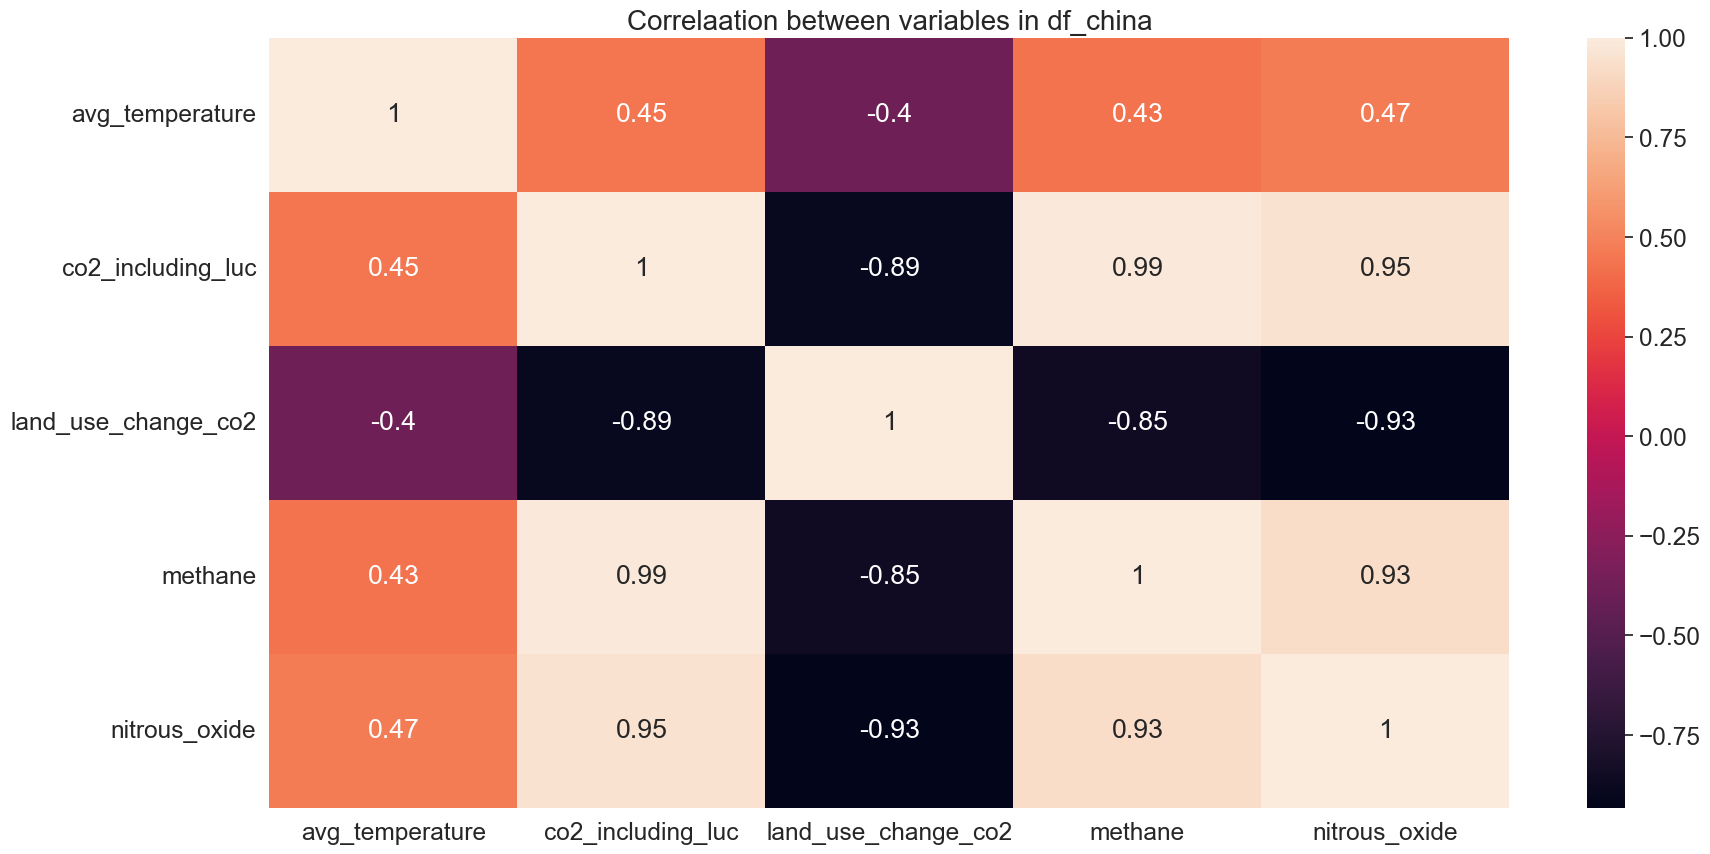

In [200]:
# Present the correlation on a heatmap
plt.figure(figsize=(20, 10))

sns.heatmap(df_china_corr, annot=True, fmt=".2g")
sns.set(font_scale=2)
plt.title("Correlaation between variables in df_china", fontsize=20)
plt.show()

> Pearson's correlation coefficient
> * +1 --> perfect positive correlation
    - increase in one variable --> increase in other variable
> * 0 --> no correlation
    - increase in one variable --> other variable unaffected
> * -1 --> perfect negative correlation
    - increase in one variable --> decrease in other variable

With reference to the heatmap above, we are looking for positve correlations between `avg_temperature` and any other variable. 

The variables that have a positive correlation with `avg_temperature` are:
1. `nitrous_oxide`
2. `co2_including_luc`
3. `methane`

Hence, these three variables may prove to be contributing factors to the increase in average surface temperature.